## Principle of Data Science Coursework Jupyter Notebook
Video Game Industry Analysis - Ho Hang Cheng


In [181]:
# Here we import the libraries going to be used
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")
from collections import Counter

# import the csv file
df=pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')




## The categorical variables:

Name - The games name
Platform - Platform of the games release
Year - Year of the game's release
Genre - Genre of the game
Publisher - Publisher of the game
Developer - Party responsible for creating the game
Rating - The ESRB ratings

## The numeric variables:
NA_Sales - Sales in North America (in millions)
EU_Sales - Sales in Europe (in millions)
JP_Sales - Sales in Japan (in millions)
Other_Sales - Sales in the rest of the world (in millions)
Global_Sales - Total worldwide sales.
Critic_score - Aggregate score compiled by Metacritic staff (0-100)
Criticcount - The number of critics used in coming up with the Criticscore
User_score - Score by Metacritic's subscribers (0-10)
Usercount - Number of users who gave the userscore


above information is from 'https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings/code'

In [182]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


First of all, we have to check the number of null values in the dataset:

In [183]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

We deleted all the rows containing null values:
And there were 6,825 rows left.

In [184]:
df = df.dropna()
df.isnull().sum().sum()
df.shape

(6825, 16)

Here we check the data type of each column.
We found that the User_Score column contains str variables,
so we convert the whole column into numeric value

In [185]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [186]:
df['User_Score'] = pd.to_numeric(df['User_Score'])

Here we tried to find out all the unique values in each categorical variables (except Rating)
We want to use 'Platform' to compare number of games published in different platform

In [188]:
print('Unique value in categorical features:')
for Col in df[['Name', 'Platform', 'Genre', 'Publisher', 'Developer','Rating']]:
    print(Col,'=', len(df[Col].unique()))

Unique value in categorical features:
Name = 4377
Platform = 17
Genre = 12
Publisher = 262
Developer = 1289
Rating = 7


In [189]:
df["Platform"].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', '3DS', 'PS4', 'PS', 'XB', 'PC',
       'PSP', 'WiiU', 'GC', 'GBA', 'XOne', 'PSV', 'DC'], dtype=object)

Below we try to find out unique value in variable "Genre".

In [190]:
df["Genre"].unique()

array(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle',
       'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure',
       'Strategy'], dtype=object)

array([<AxesSubplot:ylabel='Platform'>], dtype=object)

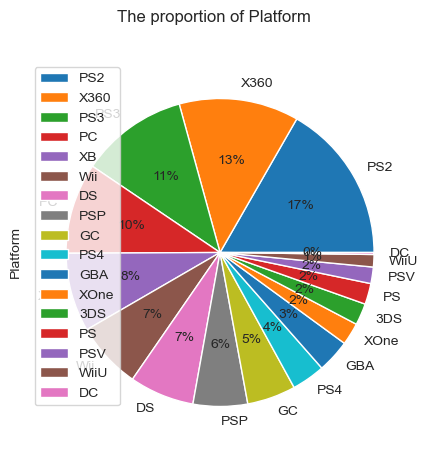

In [191]:
#Plot the proportion pie chart
ratio = pd.DataFrame(df['Platform'].value_counts())
ratio.plot.pie(subplots = True,figsize=(5,5), autopct='%1.0f%%',title = 'The proportion of Platform')

Some platforms are actually from the same series but in different generations.
We want to aggregate different generations of consoles from one company.
So:
PlayStation = PS2, PS3, PSP, PS4, PS, PSV
XBox = X360, XB, XOne
Nintendo = Wii, DS, GC, GBA, 3DS, WiiU
Sega = DC
PC = PC
Finally we now have only 5 categories in Platform

In [192]:
df['Platform'].replace({'PS2':'Playstation','PS3':'Playstation',
                    'PS':'Playstation','PS4':'Playstation',
                    'PSP':'Playstation','PSV':'Playstation',
                    'X360':'XBox','XB':'XBox','XOne':'XBox',
                    'Wii':'Nintendo','DS':'Nintendo',
                    'GC':'Nintendo','GBA':'Nintendo',
                    '3DS':'Nintendo','WiiU':'Nintendo',
                    'DC':'Sega','PC':'PC'},inplace = True)

array([<AxesSubplot:ylabel='Platform'>], dtype=object)

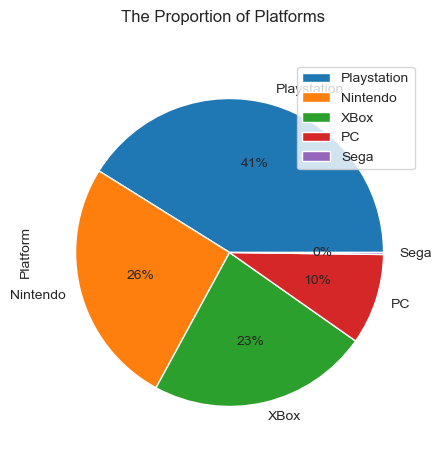

In [193]:
#Plot the proportion pie chart again with new 'Platform' column
ratio = pd.DataFrame(df['Platform'].value_counts())
ratio.plot.pie(subplots = True,figsize=(5,5), autopct='%1.0f%%',title = 'The Proportion of Platforms')

In [194]:
# Using the Counter() function from collections library
# It is a collection where elements are stored as dictionary keys and their counts are stored as dictionary values
platform = Counter(df['Platform'].tolist()).most_common()#df['Platform'].tolist()is to define it from dict into list
x = [x[0] for x in platform]#specify x = Platform label
y = [x[1] for x in platform]# specify y = Platform's count

fig = go.Bar(x = x,
             y = y)

layout = go.Layout()

fig = go.Figure(data = fig, layout = layout)

fig.update_layout(title_text='Games in Video Game Platforms ')

fig.show()
#The idea of the code is from https://www.kaggle.com/code/krishnabhatt4/video-game-sales-analysis

Sony Playstation, Nintendo and XBox are the most popular gaming console systems producers in the video games market.
The histogram above shows the total number of games published over the years in these platform.
From the graph, Sony PlayStation had the highest number of games. In the past Sega had only produced one
video game console, that is the reason why it had a significant low value in the graph. In fact, Playstation
and Nintendo had the same number of gaming consoles in the dataset which were 6, and XBox had only three of
them. If compare the sales with the number of consoles produced, XBox actually had a better performance than
Nintendo. The graph was only showing how many games in different platforms, to find out which platform had the
most players, we would also look at the sales by platforms.

We created a subset from the dataframe group by 'Platform' column, and only included sales data.

In [195]:
Platform_df = df.copy()
Platform_df = Platform_df.groupby('Platform')['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'].sum()
Platform_df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
Nintendo,782.99,416.71,212.02,109.72,1521.79
PC,63.76,104.82,0.17,17.80,187.12
Playstation,1081.82,762.90,211.45,342.45,2398.65
Sega,1.54,0.29,2.66,0.06,4.55
XBox,762.24,326.59,11.58,94.24,1194.94


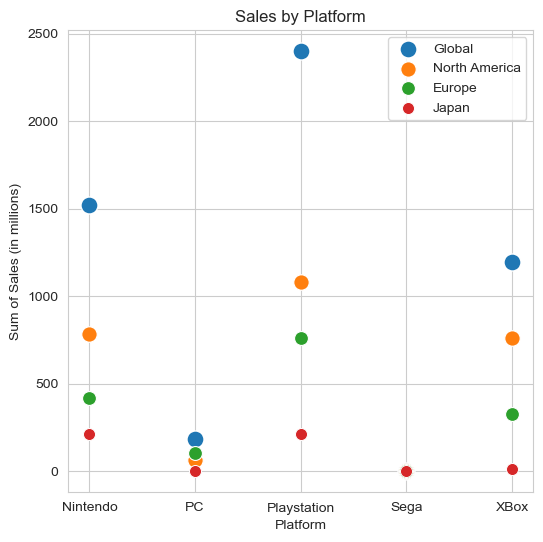

In [196]:
fig, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(data=Platform_df,x='Platform',y='Global_Sales',s=150)
sns.scatterplot(data=Platform_df,x='Platform',y='NA_Sales',s=125)
sns.scatterplot(data=Platform_df,x='Platform',y='EU_Sales',s=100)
sns.scatterplot(data=Platform_df,x='Platform',y='JP_Sales',s=75)
plt.title("Sales by Platform")
plt.ylabel('Sum of Sales (in millions)')
plt.legend(labels=['Global', 'North America', 'Europe', 'Japan'])

From the graph, PlayStation series had the highest sales among all the platforms,
And it was same in all the regions. Only in Japan, sales of Nintendo was close to PlayStation.

In [18]:
Genre = Counter(df['Genre'].tolist()).most_common()
x = [x[0] for x in Genre]
y = [x[1] for x in Genre]

fig = go.Bar(x = x,
             y = y,
             )

layout = go.Layout()

fig = go.Figure(data = fig, layout = layout)

fig.update_layout(title_text='Video Game Genres')

fig.show()
#The idea of the code is from https://www.kaggle.com/code/krishnabhatt4/video-game-sales-analysis

## Game Published Anually
To see if the video industry is declining or not,
we would use the number of game published over the years as
the indicator. The graph shows that the number of games published
reached the peak at 2007-2008, after that the number starts decreasing til 2015.

Text(0, 0.5, 'Games Published')

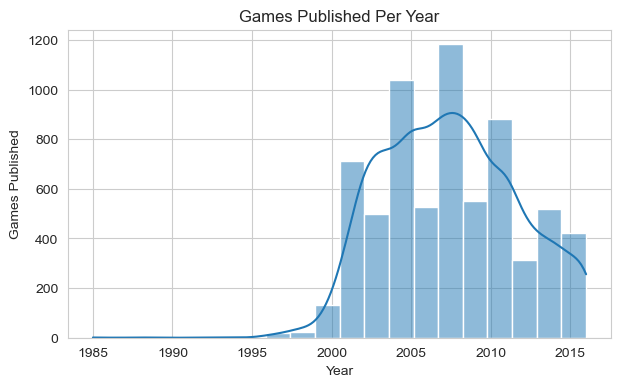

In [19]:
fig, ax = plt.subplots(figsize=(7,4))
sns.histplot(df["Year_of_Release"], kde=True,bins=20)
plt.title("Games Published Per Year")
plt.xlabel("Year")
plt.ylabel("Games Published")

Below is the code used to create a subset from the dataset.
We group up the data by year of release as rows and Sales in different regions as columns.
The subset would be used to plot the Sales over the years.

In [20]:
sales_df = df.copy()
sales_df = sales_df.groupby('Year_of_Release')['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'].mean()
sales_df

/var/folders/hx/6k4pmp6x1rs_klt_fqpt0c_r0000gn/T/ipykernel_18158/2435897166.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year_of_Release,,,,,
1985.0,0.000000,0.030000,0.000000,0.010000,0.030000
1988.0,0.000000,0.020000,0.000000,0.010000,0.030000
1992.0,0.020000,0.000000,0.000000,0.000000,0.030000
1994.0,0.390000,0.260000,0.530000,0.080000,1.270000
1996.0,1.130000,0.982857,0.580000,0.177143,2.871429
1997.0,1.180000,0.666923,0.693077,0.155385,2.693077
1998.0,0.725200,0.485200,0.432400,0.085600,1.727200
1999.0,0.777333,0.523000,0.322333,0.081667,1.705667
2000.0,0.385686,0.247059,0.110490,0.053824,0.796471


Text(0, 0.5, 'Sales (in millions)')

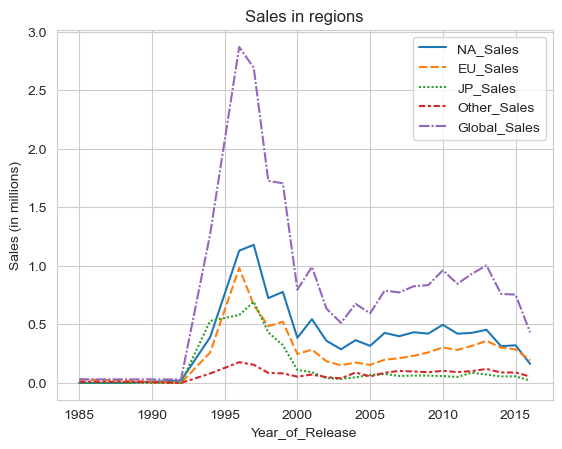

In [28]:
sns.lineplot(data=sales_df)
plt.title('Sales in regions')
plt.ylabel('Sales (in millions)')

The graph is showing the sales in different regions over the years.

In [198]:
Genre_df = df.copy()
Genre_df = Genre_df.groupby('Genre')['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'].sum()

In [199]:
Genre_df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,591.23,387.78,76.17,147.46,1203.16
Adventure,38.81,25.06,8.73,8.05,80.75
Fighting,136.39,60.50,27.85,25.14,249.95
Misc,222.05,120.46,33.22,40.41,416.26
Platform,193.60,108.56,43.09,32.53,377.80
Puzzle,33.50,24.04,14.98,6.33,78.90
Racing,225.59,164.66,27.76,58.29,476.22
Role-Playing,219.53,119.20,122.47,40.36,501.37
Shooter,448.76,261.12,18.57,87.90,816.48


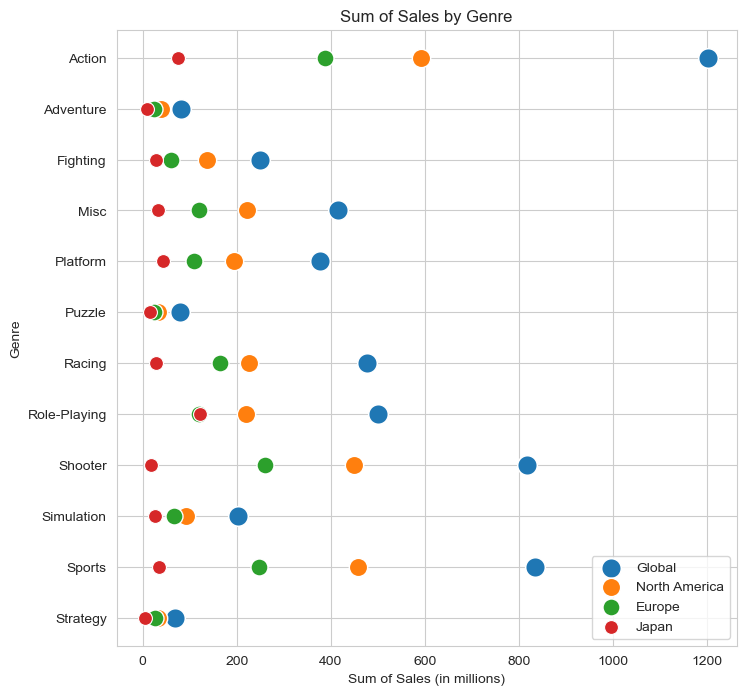

In [200]:
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(data=Genre_df,y='Genre',x='Global_Sales',s=200)
sns.scatterplot(data=Genre_df,y='Genre',x='NA_Sales',s=175)
sns.scatterplot(data=Genre_df,y='Genre',x='EU_Sales',s=150)
sns.scatterplot(data=Genre_df,y='Genre',x='JP_Sales',s=100)
plt.title("Sum of Sales by Genre")
plt.xlabel('Sum of Sales (in millions)')
plt.legend(labels=['Global', 'North America', 'Europe', 'Japan'])

The figure above is a scatter plot of total sales made from different genre of video games.
We sum up the sales over the years to see which genre made the most revenue. There are four
points in each genre which are representing global sales, sales in North America, sales in Europe
and sales in Japan respectively. From the graph, we can see that Action games had the highest
sales in the global market. As for North America market, Action games also had the first place in sales.
Moreover, the Europe market had the same situation as North America. Despite the global market,
The genre had the highest sales in Japan is role-playing games, but action games still
had the second place, and Japan only accounts for a small part of the global video game market.
In overall, action games were the mainstream in video games.

In [25]:
from scipy import stats
print(stats.pearsonr(df['Global_Sales'], df['Critic_Score']))
print(stats.pearsonr(df['Global_Sales'], df['User_Score']))

PearsonRResult(statistic=0.2375557222827451, pvalue=3.5137111422915553e-88)
PearsonRResult(statistic=0.08834852634696767, pvalue=2.6368551232157713e-13)


Two Pearson correlation coefficients was computed to assess the linear relationship between
global sales and critic score, also global sales and user score.
For global sales and critic score, there was a positive correlation between the two variables,
r = .24, p = .035.
For global sales and user score, there was also a positive correlation between them,
r = .09, p = .026.
Although both scoring features had positive correlation with global sales, their correlation were weak with global sales.

Global_Sales       1.000000
NA_Sales           0.955793
EU_Sales           0.939313
Other_Sales        0.804028
JP_Sales           0.613546
Critic_Count       0.290397
User_Count         0.264151
Critic_Score       0.237556
User_Score         0.088349
Year_of_Release    0.006661
Name: Global_Sales, dtype: float64 



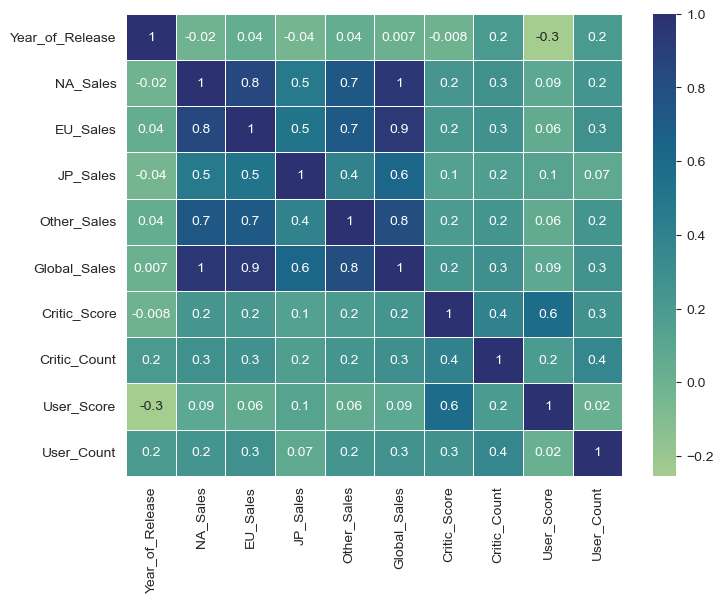

In [201]:
#The correlated feature in descending order (correlation with Global_Sales)
numeric_features = df.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print (corr['Global_Sales'].sort_values(ascending=False)[:10], '\n')


#Plot the correlation heatmap

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="crest", linewidths=0.5);

Here we would use the most correlated feature to predict the global sales,
which is the NA_Sales. A linear regression would be performed

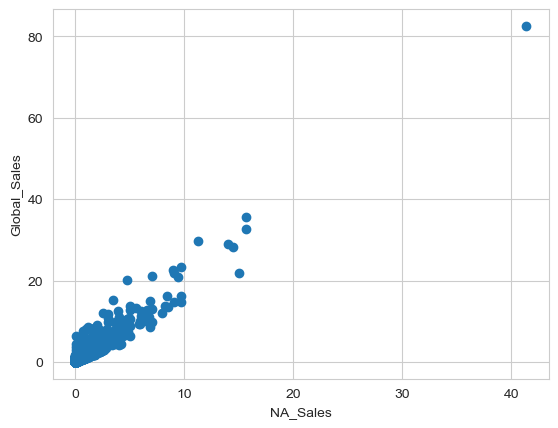

In [109]:
plt.scatter(df['NA_Sales'],df['Global_Sales'])
plt.xlabel("NA_Sales")
plt.ylabel("Global_Sales")
plt.show()

from the above graph, we can see there is a positive correlation between NA_Sales and Global_Sales

Text(0.5, 0, 'Europe')

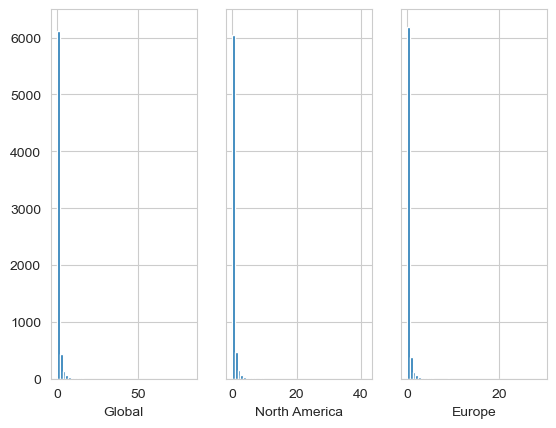

In [126]:
fig, ax = plt.subplots(1,3,sharey=True)
ax[0].hist(df['Global_Sales'],50)
ax[0].set_xlabel('Global')

ax[1].hist(df['NA_Sales'],50)
ax[1].set_xlabel('North America')

ax[2].hist(df['EU_Sales'],50)
ax[2].set_xlabel('Europe')


We used histogram to plot the distribution of the dependent variable 'Global_Sales'
and the independent variables 'NA_Sales'and 'EU_Sales'. These three variable were not
normally distributed. We would standardize them before building model.

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
# Train Test Split
X = df[['NA_Sales']]
Y = df[['Global_Sales']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=True)
model = make_pipeline(StandardScaler(), LinearRegression())

model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.9457479276973233

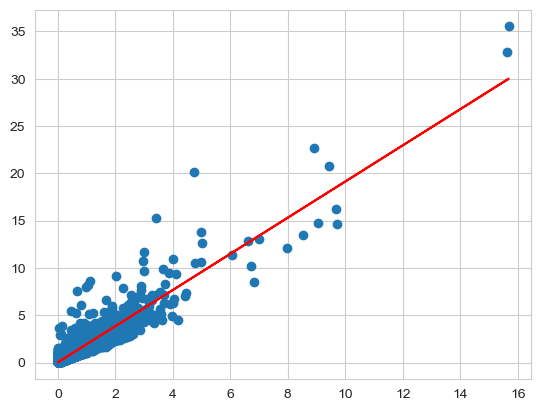

In [138]:
predictY = model.predict(X_train)
plt.scatter(X_train,Y_train)
plt.plot(X_train,predictY,'r')

Here we get the parameter of the regression model.

In [139]:
X = df[['NA_Sales','EU_Sales']]
Y = df[['Global_Sales']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=True)
model2 = make_pipeline(StandardScaler(), LinearRegression())

model2.fit(X_train,Y_train)
model2.score(X_test,Y_test)

0.9881834443030679

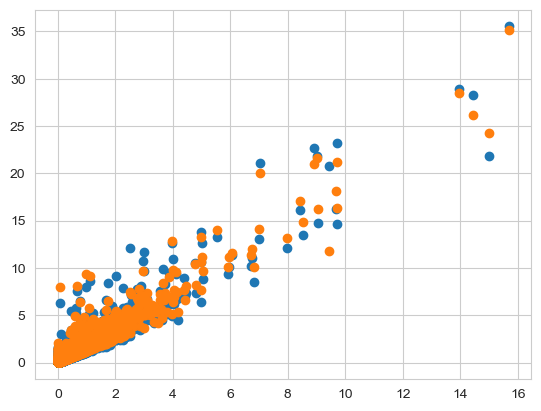

In [147]:
predictY = model2.predict(X_train)
plt.scatter(X_train['NA_Sales'],Y_train)
plt.scatter(X_train['NA_Sales'],predictY)

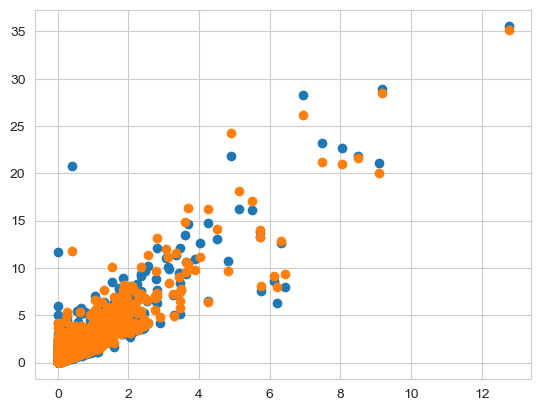

In [148]:
predictY = model2.predict(X_train)
plt.scatter(X_train['EU_Sales'],Y_train)
plt.scatter(X_train['EU_Sales'],predictY)

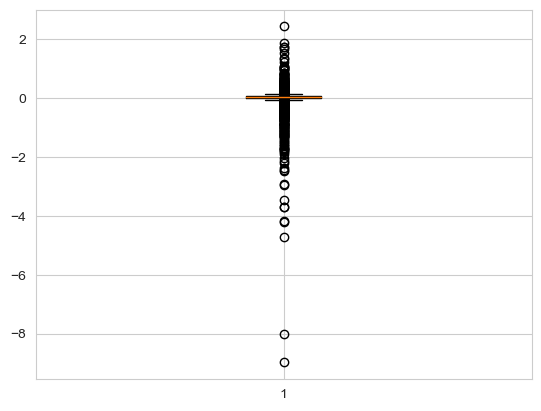

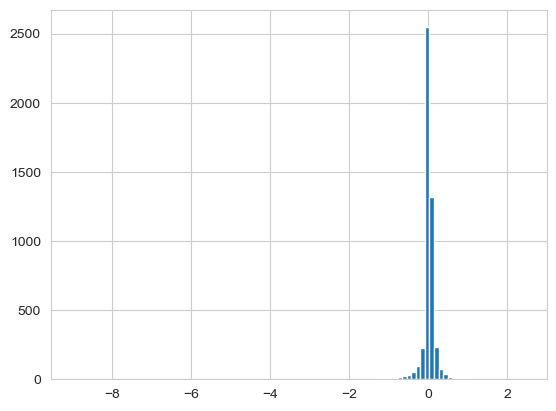

Mean: 1.1591453496583563e-16
Standard deviation: 0.3227306810720622


In [172]:
import statistics
resid = predictY-Y_train
plt.boxplot(resid)
plt.show()
plt.hist(resid,bins=100)
plt.show()
resid.describe()
print('Mean:',(resid.mean()[0]))
print('Standard deviation:',(resid.std()[0]))

The mean of the residual distribution is very close to zero, which means it is a good model
to make prediction.

We got a higher R2 score when we add EU_Sales as the second independent variable,
which means this model is capturing more of the variation

In [177]:
X_train

,NA_Sales,EU_Sales
29,9.04,4.24
4570,0.24,0.16
11141,0.08,0.00
11560,0.06,0.02
4235,0.38,0.01
...,...,...
8125,0.01,0.14
277,2.25,1.47
9775,0.05,0.00
9585,0.10,0.03


In [178]:
import statsmodels.api as sm
dependent = Y_train
independents = X_train
independents_with_const = sm.add_constant(independents)
MRmodel = sm.OLS(dependent,independents_with_const)
results = MRmodel.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                 6.552e+04
Date:                Tue, 13 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:29:55   Log-Likelihood:                -1375.3
No. Observations:                4777   AIC:                             2757.
Df Residuals:                    4774   BIC:                             2776.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0044      0.005      0.859      0.3